In [163]:
#!/usr/bin/env python3

'''
#@author narumeena
#@project norfScore
#@description 1) clean the annotatio files and prepare for exploratory analysis for noncoding only 

'''

'\n#@author narumeena\n#@project norfScore\n#@description 1) clean the annotatio files and prepare for exploratory analysis for noncoding only \n\n'

In [164]:
import pandas as pd 
import numpy as np

# All norfs 

# pathogenic 

In [165]:
pathegenic_coding =  pd.read_csv('../../analysis/slectedVariantsmappedTonorfs/noncodingNorfs/pathogenic/GRCh38-v1.6_anno_361404f60ba8c94bb69b0b1bfdad1fa2.tsv.gz',
                       compression='gzip',
                         sep='\t', error_bad_lines=False,skiprows = 1)

In [166]:
pathegenic_coding.head()

,#Chrom,Pos,Ref,Alt,Type,Length,AnnoType,Consequence,ConsScore,ConsDetail,...,Freq10000bp,Rare10000bp,Sngl10000bp,EnsembleRegulatoryFeature,dbscSNV-ada_score,dbscSNV-rf_score,RemapOverlapTF,RemapOverlapCL,RawScore,PHRED
0,1,25306730,G,T,SNV,0,Transcript,INTRONIC,2,"intron,NMD",...,0,1,622,NaN,0.99997,0.794,NaN,NaN,4.128080,28.000
1,1,25316999,G,A,SNV,0,Transcript,INTRONIC,2,"intron,NMD",...,0,1,557,NaN,0.99998,0.946,NaN,NaN,4.204575,28.700
2,1,25317010,C,T,SNV,0,Transcript,INTRONIC,2,"intron,NMD",...,0,1,559,NaN,NaN,NaN,NaN,NaN,0.897451,10.410
3,1,25321905,TA,T,DEL,1,Transcript,INTRONIC,2,intron,...,0,5,404,NaN,NaN,NaN,NaN,NaN,0.697430,8.431
4,1,25321905,TA,T,DEL,1,Transcript,INTRONIC,2,"intron,NMD",...,0,5,404,NaN,NaN,NaN,NaN,NaN,0.697430,8.431


In [167]:
pathegenic_coding = pathegenic_coding.replace('NA', np.NaN)

In [168]:
#set categories to 1 for pathogenic
pathegenic_coding['category']=1





In [169]:
pathegenic_coding.shape

(375, 135)

In [170]:
pd.options.display.max_rows = 4000
pathegenic_coding.isnull().sum()

#Chrom                         0
Pos                            0
Ref                            0
Alt                            0
Type                           0
Length                         0
AnnoType                       0
Consequence                    0
ConsScore                      0
ConsDetail                     0
GC                             0
CpG                            0
motifECount                  353
motifEName                   353
motifEHIPos                  353
motifEScoreChng              361
oAA                          306
nAA                          307
GeneID                       146
FeatureID                      0
GeneName                     146
CCDS                         273
Intron                       317
Exon                         295
cDNApos                      296
relcDNApos                   296
CDSpos                       306
relCDSpos                    306
protPos                      306
relProtPos                   306
Domain    

In [171]:
#30% missing value cut off 
pathegenic_coding = pathegenic_coding[pathegenic_coding.columns[pathegenic_coding.isnull().mean() < 0.3]]

In [172]:
pd.options.display.max_rows = 4000
pathegenic_coding.isnull().sum()

#Chrom                         0
Pos                            0
Ref                            0
Alt                            0
Type                           0
Length                         0
AnnoType                       0
Consequence                    0
ConsScore                      0
ConsDetail                     0
GC                             0
CpG                            0
FeatureID                      0
minDistTSS                     0
minDistTSE                     0
priPhCons                      0
mamPhCons                      0
verPhCons                      0
priPhyloP                      0
mamPhyloP                      0
verPhyloP                      0
bStatistic                     0
cHmm_E1                        0
cHmm_E2                        0
cHmm_E3                        0
cHmm_E4                        0
cHmm_E5                        0
cHmm_E6                        0
cHmm_E7                        0
cHmm_E8                        0
cHmm_E9   

In [173]:
pathegenic_coding = pathegenic_coding[['#Chrom','Pos','PHRED','Ref', 'Alt', 'Consequence', 'GC', 'CpG', 'minDistTSS', 'minDistTSE',
       'priPhCons', 'mamPhCons', 'verPhCons', 'priPhyloP', 'mamPhyloP',
       'verPhyloP', 'bStatistic', 'cHmm_E1', 'cHmm_E2', 'cHmm_E3', 'cHmm_E4',
       'cHmm_E5', 'cHmm_E6', 'cHmm_E7', 'cHmm_E8', 'cHmm_E9', 'cHmm_E10',
       'cHmm_E11', 'cHmm_E12', 'cHmm_E13', 'cHmm_E14', 'cHmm_E15', 'cHmm_E16',
       'cHmm_E17', 'cHmm_E18', 'cHmm_E19', 'cHmm_E20', 'cHmm_E21', 'cHmm_E22',
       'cHmm_E23', 'cHmm_E24', 'cHmm_E25', 'GerpN', 'GerpS',
       'EncodeH3K4me1-max', 'EncodeH3K4me2-max', 'EncodeH3K4me3-max',
       'EncodeH3K9ac-max', 'EncodeH3K9me3-max', 'EncodeH3K27ac-max',
       'EncodeH3K27me3-max', 'EncodeH3K36me3-max', 'EncodeH3K79me2-max',
       'EncodeH4K20me1-max', 'EncodeH2AFZ-max', 'EncodeDNase-max',
       'EncodetotalRNA-max','category']]

In [174]:
pathegenic_coding.head()

,#Chrom,Pos,PHRED,Ref,Alt,Consequence,GC,CpG,minDistTSS,minDistTSE,...,EncodeH3K9me3-max,EncodeH3K27ac-max,EncodeH3K27me3-max,EncodeH3K36me3-max,EncodeH3K79me2-max,EncodeH4K20me1-max,EncodeH2AFZ-max,EncodeDNase-max,EncodetotalRNA-max,category
0,1,25306730,28.000,G,T,INTRONIC,0.550,0.040,30504,213,...,0.69,1.65,1.08,2.88,2.42,2.47,2.24,0.06,0.17,1
1,1,25316999,28.700,G,A,INTRONIC,0.530,0.027,20235,4902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
2,1,25317010,10.410,C,T,INTRONIC,0.523,0.013,20224,4891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,1
3,1,25321905,8.431,TA,T,INTRONIC,0.305,0.000,15328,6,...,0.63,1.20,NaN,0.63,1.09,1.02,1.16,0.04,0.30,1
4,1,25321905,8.431,TA,T,INTRONIC,0.305,0.000,15328,6,...,0.63,1.20,NaN,0.63,1.09,1.02,1.16,0.04,0.30,1


# benign 

In [175]:
benign =   pd.read_csv('../../analysis/slectedVariantsmappedTonorfs/noncodingNorfs/benign/GRCh38-v1.6_anno_a94eef5511588604228e47cae69c3c67.tsv.gz',
                       compression='gzip',
                         sep='\t', error_bad_lines=False,skiprows = 1)

In [176]:
benign.head()

,#Chrom,Pos,Ref,Alt,Type,Length,AnnoType,Consequence,ConsScore,ConsDetail,...,Freq10000bp,Rare10000bp,Sngl10000bp,EnsembleRegulatoryFeature,dbscSNV-ada_score,dbscSNV-rf_score,RemapOverlapTF,RemapOverlapCL,RawScore,PHRED
0,1,9169593,T,C,SNV,0,RegulatoryFeature,REGULATORY,4,regulatory,...,16.0,61.0,1310.0,Open chromatin,NaN,NaN,NaN,NaN,0.143857,2.512
1,1,16888940,C,G,SNV,0,RegulatoryFeature,REGULATORY,4,regulatory,...,0.0,0.0,663.0,Promoter,NaN,NaN,34.0,45.0,0.335802,4.702
2,1,26218196,A,G,SNV,0,Intergenic,DOWNSTREAM,1,downstream,...,50.0,65.0,1296.0,NaN,NaN,NaN,1.0,1.0,-0.069329,0.960
3,1,38072591,T,C,SNV,0,Transcript,INTRONIC,2,"intron,non_coding",...,23.0,44.0,1277.0,NaN,NaN,NaN,2.0,2.0,0.450670,5.981
4,1,42891415,C,T,SNV,0,NonCodingTranscript,NONCODING_CHANGE,5,non_coding_exon,...,23.0,59.0,1370.0,NaN,NaN,NaN,NaN,NaN,0.123363,2.308


In [177]:
benign.shape

(487, 134)

In [178]:
benign = benign.replace('NA', np.NaN)

In [179]:
#set categories to 0 for benign
benign['category']=0

In [180]:
pd.options.display.max_rows = 4000
benign.isnull().sum()

#Chrom                         0
Pos                            0
Ref                            0
Alt                            0
Type                           0
Length                         0
AnnoType                       0
Consequence                    0
ConsScore                      0
ConsDetail                     0
GC                             0
CpG                            0
motifECount                  484
motifEName                   484
motifEHIPos                  484
motifEScoreChng              484
oAA                          487
nAA                          487
GeneID                        95
FeatureID                      0
GeneName                      95
CCDS                         470
Intron                       158
Exon                         463
cDNApos                      463
relcDNApos                   463
CDSpos                       487
relCDSpos                    487
protPos                      487
relProtPos                   487
Domain    

In [181]:
#30% missing value cut off 
#benign = benign[benign.columns[benign.isnull().mean() < 0.3]]

In [182]:
pd.options.display.max_rows = 4000
benign.isnull().sum()

#Chrom                         0
Pos                            0
Ref                            0
Alt                            0
Type                           0
Length                         0
AnnoType                       0
Consequence                    0
ConsScore                      0
ConsDetail                     0
GC                             0
CpG                            0
motifECount                  484
motifEName                   484
motifEHIPos                  484
motifEScoreChng              484
oAA                          487
nAA                          487
GeneID                        95
FeatureID                      0
GeneName                      95
CCDS                         470
Intron                       158
Exon                         463
cDNApos                      463
relcDNApos                   463
CDSpos                       487
relCDSpos                    487
protPos                      487
relProtPos                   487
Domain    

In [183]:
benign = benign[['#Chrom','Pos','PHRED','Ref', 'Alt', 'Consequence', 'GC', 'CpG', 'minDistTSS', 'minDistTSE',
       'priPhCons', 'mamPhCons', 'verPhCons', 'priPhyloP', 'mamPhyloP',
       'verPhyloP', 'bStatistic', 'cHmm_E1', 'cHmm_E2', 'cHmm_E3', 'cHmm_E4',
       'cHmm_E5', 'cHmm_E6', 'cHmm_E7', 'cHmm_E8', 'cHmm_E9', 'cHmm_E10',
       'cHmm_E11', 'cHmm_E12', 'cHmm_E13', 'cHmm_E14', 'cHmm_E15', 'cHmm_E16',
       'cHmm_E17', 'cHmm_E18', 'cHmm_E19', 'cHmm_E20', 'cHmm_E21', 'cHmm_E22',
       'cHmm_E23', 'cHmm_E24', 'cHmm_E25', 'GerpN', 'GerpS',
       'EncodeH3K4me1-max', 'EncodeH3K4me2-max', 'EncodeH3K4me3-max',
       'EncodeH3K9ac-max', 'EncodeH3K9me3-max', 'EncodeH3K27ac-max',
       'EncodeH3K27me3-max', 'EncodeH3K36me3-max', 'EncodeH3K79me2-max',
       'EncodeH4K20me1-max', 'EncodeH2AFZ-max', 'EncodeDNase-max',
       'EncodetotalRNA-max','category']]

In [184]:
benign.head()

,#Chrom,Pos,PHRED,Ref,Alt,Consequence,GC,CpG,minDistTSS,minDistTSE,...,EncodeH3K9me3-max,EncodeH3K27ac-max,EncodeH3K27me3-max,EncodeH3K36me3-max,EncodeH3K79me2-max,EncodeH4K20me1-max,EncodeH2AFZ-max,EncodeDNase-max,EncodetotalRNA-max,category
0,1,9169593,2.512,T,C,REGULATORY,0.497,0.040,12800,21582,...,1.55,2.72,1.29,9.70,12.65,4.90,2.04,0.21,0.36,0
1,1,16888940,4.702,C,G,REGULATORY,0.682,0.160,156,398,...,3.54,22.66,7.04,1.44,2.76,2.26,15.46,0.24,0.08,0
2,1,26218196,0.960,A,G,DOWNSTREAM,0.437,0.040,2082,386,...,1.16,0.96,2.02,0.96,0.89,1.99,0.71,0.03,NaN,0
3,1,38072591,5.981,T,C,INTRONIC,0.510,0.000,25166,33144,...,3.06,1.65,3.54,0.88,1.54,2.46,2.41,0.06,0.03,0
4,1,42891415,2.308,C,T,NONCODING_CHANGE,0.464,0.027,1016,321,...,1.44,0.98,4.79,0.98,0.67,1.99,2.72,0.07,NaN,0


In [185]:
benign.shape

(487, 58)

In [186]:
filtredAttributes  = pd.concat([benign,pathegenic_coding], ignore_index=True).drop_duplicates()

In [187]:
#missing values replacement 

filtredAttributes['priPhCons'].fillna(0.115,inplace=True)
filtredAttributes['mamPhCons'].fillna(0.079,inplace=True)
filtredAttributes['verPhCons'].fillna(0.094,inplace=True)
filtredAttributes['priPhyloP'].fillna(-0.033,inplace=True)
filtredAttributes['mamPhyloP'].fillna(-0.038,inplace=True)
filtredAttributes['verPhyloP'].fillna(0.017,inplace=True)
filtredAttributes['bStatistic'].fillna(800.261,inplace=True)
filtredAttributes['minDistTSS'].fillna(10000000,inplace=True)
filtredAttributes['minDistTSE'].fillna(10000000,inplace=True)
#filtredAttributes['RemapOverlapTF'].fillna(0.5,inplace=True)
filtredAttributes['EncodeH3K4me1-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K4me2-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K4me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K9ac-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K9me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K27ac-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K27me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K36me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K79me2-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH4K20me1-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH2AFZ-max'].fillna(0,inplace=True)
filtredAttributes['EncodetotalRNA-max'].fillna(0,inplace=True)
filtredAttributes['EncodeDNase-max'].fillna(0,inplace=True)

In [188]:
filtredAttributes.head()

,#Chrom,Pos,PHRED,Ref,Alt,Consequence,GC,CpG,minDistTSS,minDistTSE,...,EncodeH3K9me3-max,EncodeH3K27ac-max,EncodeH3K27me3-max,EncodeH3K36me3-max,EncodeH3K79me2-max,EncodeH4K20me1-max,EncodeH2AFZ-max,EncodeDNase-max,EncodetotalRNA-max,category
0,1,9169593,2.512,T,C,REGULATORY,0.497,0.040,12800,21582,...,1.55,2.72,1.29,9.70,12.65,4.90,2.04,0.21,0.36,0
1,1,16888940,4.702,C,G,REGULATORY,0.682,0.160,156,398,...,3.54,22.66,7.04,1.44,2.76,2.26,15.46,0.24,0.08,0
2,1,26218196,0.960,A,G,DOWNSTREAM,0.437,0.040,2082,386,...,1.16,0.96,2.02,0.96,0.89,1.99,0.71,0.03,0.00,0
3,1,38072591,5.981,T,C,INTRONIC,0.510,0.000,25166,33144,...,3.06,1.65,3.54,0.88,1.54,2.46,2.41,0.06,0.03,0
4,1,42891415,2.308,C,T,NONCODING_CHANGE,0.464,0.027,1016,321,...,1.44,0.98,4.79,0.98,0.67,1.99,2.72,0.07,0.00,0


In [189]:
filtredAttributes.shape

(848, 58)

In [190]:
#replace X and Y chromosome with 23 and 24 repectively 
#filtredAttributes['#Chrom'] = filtredAttributes['#Chrom'].map({'X': 23, 'Y': 24})

In [191]:
from sklearn.model_selection import train_test_split # split the dataset into traninig and testing dataset 

from sklearn.ensemble.forest import RandomForestClassifier# to import the random forest Model 
from sklearn.metrics import roc_curve, auc                # to import roc curve abd auc metrics for evaluation 
#from sklearn.grid_search import GridSearchCV              # grid search is used for hyperparameters-optimization
from sklearn.model_selection import KFold                # cross validation using the kfold algorithm
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials     # library for hyperparameters-optimization
from sklearn.model_selection import cross_val_score

import seaborn as sns                                     # Python graphing library
import matplotlib.pyplot as plt
from rfpimp import *
%matplotlib inline

In [192]:
filtredAttributes = filtredAttributes.fillna(0)

In [193]:
#filter SNPs only 

In [194]:
NA = ['A','T','G','C']

In [195]:
filtredAttributes = filtredAttributes.loc[filtredAttributes['Ref'].isin(NA)]

In [196]:
filtredAttributes = filtredAttributes.loc[filtredAttributes['Alt'].isin(NA)]

# for CADD Adn FATHM scores 

In [197]:
# Labels are the values we want to predict
labels = filtredAttributes['category']
labels

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [198]:
# Remove the labels from the features
# axis 1 refers to the columns
features= filtredAttributes.drop('category', axis = 1)
features.head()

,#Chrom,Pos,PHRED,Ref,Alt,Consequence,GC,CpG,minDistTSS,minDistTSE,...,EncodeH3K9ac-max,EncodeH3K9me3-max,EncodeH3K27ac-max,EncodeH3K27me3-max,EncodeH3K36me3-max,EncodeH3K79me2-max,EncodeH4K20me1-max,EncodeH2AFZ-max,EncodeDNase-max,EncodetotalRNA-max
0,1,9169593,2.512,T,C,REGULATORY,0.497,0.040,12800,21582,...,2.07,1.55,2.72,1.29,9.70,12.65,4.90,2.04,0.21,0.36
1,1,16888940,4.702,C,G,REGULATORY,0.682,0.160,156,398,...,37.68,3.54,22.66,7.04,1.44,2.76,2.26,15.46,0.24,0.08
2,1,26218196,0.960,A,G,DOWNSTREAM,0.437,0.040,2082,386,...,2.36,1.16,0.96,2.02,0.96,0.89,1.99,0.71,0.03,0.00
3,1,38072591,5.981,T,C,INTRONIC,0.510,0.000,25166,33144,...,1.29,3.06,1.65,3.54,0.88,1.54,2.46,2.41,0.06,0.03
4,1,42891415,2.308,C,T,NONCODING_CHANGE,0.464,0.027,1016,321,...,0.63,1.44,0.98,4.79,0.98,0.67,1.99,2.72,0.07,0.00


In [199]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [232]:
x_train.shape

(447, 57)

In [201]:
x_test

,#Chrom,Pos,PHRED,Ref,Alt,Consequence,GC,CpG,minDistTSS,minDistTSE,...,EncodeH3K9ac-max,EncodeH3K9me3-max,EncodeH3K27ac-max,EncodeH3K27me3-max,EncodeH3K36me3-max,EncodeH3K79me2-max,EncodeH4K20me1-max,EncodeH2AFZ-max,EncodeDNase-max,EncodetotalRNA-max
189,18,39592871,5.111,C,T,REGULATORY,0.344,0.000,207448,385947,...,2.23,1.35,1.82,1.01,2.59,1.09,3.23,0.78,0.02,0.15
493,12,79448958,24.000,T,C,REGULATORY,0.477,0.080,6503,1322,...,2.07,1.57,1.31,4.28,2.77,1.42,3.06,2.35,0.05,0.37
302,3,82180454,0.343,T,C,INTRONIC,0.351,0.027,194302,22001,...,1.36,2.08,0.39,3.07,2.38,0.92,1.99,1.74,0.05,0.05
154,16,55762217,0.311,G,A,INTRONIC,0.437,0.013,1575,11295,...,0.63,0.00,0.34,0.11,0.00,0.00,0.00,0.27,0.01,0.00
647,2,121530925,18.580,G,A,REGULATORY,0.470,0.053,44,83,...,42.35,0.89,48.29,0.55,0.72,2.67,2.74,4.55,9.81,3.45
326,3,181576867,0.885,A,G,INTRONIC,0.457,0.013,13146,34781,...,1.57,5.71,1.81,1.73,1.13,1.42,2.04,3.30,0.09,0.00
410,7,32660605,0.390,A,G,INTRONIC,0.417,0.027,101183,79656,...,1.38,1.93,5.26,3.64,1.90,2.45,1.00,5.20,0.04,0.03
48,10,50705851,0.947,T,C,INTRONIC,0.384,0.013,3056,471,...,1.35,0.00,0.55,0.62,0.35,0.31,0.00,0.27,0.03,0.00
174,17,72098172,0.642,C,A,INTRONIC,0.464,0.027,12377,7351,...,0.76,1.53,0.71,1.14,0.69,1.14,1.98,0.89,0.04,0.06
287,22,49491820,2.953,T,C,INTRONIC,0.649,0.067,165638,55596,...,1.90,3.99,0.89,1.21,1.04,2.13,1.00,2.24,0.09,0.00


In [202]:
#variants for  FATHMM score 

fathmm = x_test[['#Chrom','Pos','Ref', 'Alt']]

In [203]:
#cadd score 

cadd = x_test[['PHRED']]
cadd.head(n=100)

,PHRED
189,5.111
493,24.000
302,0.343
154,0.311
647,18.580
326,0.885
410,0.390
48,0.947
174,0.642
287,2.953


In [204]:
cadd['PHRED'] = np.where(cadd['PHRED'] < 17.0, 0, cadd['PHRED'])
cadd['PHRED'] = np.where(cadd['PHRED'] > 17.0, 1, cadd['PHRED'])
cadd['PHRED'] = cadd['PHRED'].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [205]:
cadd['PHRED'].values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [206]:
cadd.head(n=100)

,PHRED
189,0
493,1
302,0
154,0
647,1
326,0
410,0
48,0
174,0
287,0


In [207]:
filtredAttributes = filtredAttributes.drop(['#Chrom','Pos','PHRED'], axis=1)

# FATHMM

In [425]:
#variants for  FATHMM score 

fathmm_test = x_test[['#Chrom','Pos','Ref', 'Alt']]

In [426]:
fathmm_pathogenic1 = pd.read_csv('../../analysis/slectedVariantsmappedTonorfs/allNorfs/pathogenic/8c7f3579-0d50-42f7-8b0d-1603ea076632.tab',
                           sep='\t', error_bad_lines=False,)

In [427]:
fathmm_pathogenic1.head(n=100)

,# Chromosome,Position,Ref. Base,Mutant Base,Coding Score,Non-Coding Score,Warning
0,1,943995,C,T,0.162572,--,benign
1,1,1014143,C,T,0.255233,--,benign
2,1,1022225,G,A,0.892676,--,pathogenic
3,1,1022313,A,T,0.859836,--,pathogenic
4,1,1041582,C,T,0.046305,--,benign
5,1,1042136,T,TC,--,--,Error: nucleotide must be A/C/G/T
6,1,1050473,G,A,0.911184,--,pathogenic
7,1,1050575,G,C,0.935698,--,pathogenic
8,1,1050763,G,T,0.737517,--,pathogenic
9,1,1051775,G,A,0.951629,--,pathogenic


In [428]:
fathmm_pathogenic2 = pd.read_csv('../../analysis/slectedVariantsmappedTonorfs/allNorfs/pathogenic/6274ecac-a7a7-460b-821d-56b67cb72d8e.tab',
                           sep='\t', error_bad_lines=False,)

In [429]:
fathmm_pathogenic2.head(n=100)

,# Chromosome,Position,Ref. Base,Mutant Base,Coding Score,Non-Coding Score,Warning
0,19,1399148,G,A,0.964214,--,pathogenic
1,19,1401317,C,G,0.902864,--,pathogenic
2,19,1401325,T,G,0.917430,--,pathogenic
3,19,1401329,T,G,0.955814,--,pathogenic
4,19,1401331,TA,T,--,--,Error: nucleotide must be A/C/G/T
5,19,1401344,A,T,0.950387,--,pathogenic
6,19,1401412,G,GC,--,--,Error: nucleotide must be A/C/G/T
7,19,1401418,C,G,0.904639,--,pathogenic
8,19,1401418,C,CA,--,--,Error: nucleotide must be A/C/G/T
9,19,1401429,G,T,0.081832,--,benign


In [430]:
fathmm_benign1 = pd.read_csv('../../analysis/slectedVariantsmappedTonorfs/allNorfs/benign/3a6edc69-b9f4-48ac-86fa-59c4ad6d2b2f.tab',
                           sep='\t', error_bad_lines=False,)

In [431]:
fathmm_benign1.head(n=100)

,# Chromosome,Position,Ref. Base,Mutant Base,Coding Score,Non-Coding Score,Warning
0,11,131398238,C,T,--,0.019151,benign (high conf.)
1,22,33424661,T,C,--,0.013558,benign (high conf.)
2,17,50194658,C,A,--,0.018640,benign (high conf.)
3,7,1575038,G,A,--,0.010969,benign (high conf.)
4,13,33156684,T,A,--,0.015896,benign (high conf.)
5,10,26130684,G,A,--,0.021653,benign (high conf.)
6,8,116745870,A,G,--,0.010167,benign (high conf.)
7,5,175488556,T,C,--,0.013159,benign (high conf.)
8,19,41370565,T,C,--,0.013779,benign (high conf.)
9,16,25163693,C,A,--,0.016745,benign (high conf.)


In [432]:
fathmm_benign2 = pd.read_csv('../../analysis/slectedVariantsmappedTonorfs/allNorfs/benign/71db0fb5-8f45-4ce6-affd-a4cdb45f5194.tab',
                           sep='\t', error_bad_lines=False,)

In [433]:
fathmm_benign2.head(n=100)

,# Chromosome,Position,Ref. Base,Mutant Base,Coding Score,Non-Coding Score,Warning
0,2,63619587,A,C,--,0.016237,benign (high conf.)
1,2,207536004,A,G,--,0.010858,benign (high conf.)
2,16,27755929,A,G,--,0.016114,benign (high conf.)
3,3,42969854,C,G,--,0.010434,benign (high conf.)
4,4,95490713,G,A,--,0.016815,benign (high conf.)
5,2,158236461,C,T,--,0.032369,benign
6,12,4731455,C,T,--,0.014951,benign (high conf.)
7,7,5745470,G,A,--,0.012011,benign (high conf.)
8,5,147716565,C,T,--,0.016379,benign (high conf.)
9,17,65875731,A,C,--,0.013948,benign (high conf.)


In [434]:
fathmm = pd.concat([fathmm_pathogenic1,fathmm_pathogenic2,fathmm_benign1,fathmm_benign2], ignore_index=True).drop_duplicates()

In [435]:
fathmm.head()

,# Chromosome,Position,Ref. Base,Mutant Base,Coding Score,Non-Coding Score,Warning
0,1,943995,C,T,0.162572,--,benign
1,1,1014143,C,T,0.255233,--,benign
2,1,1022225,G,A,0.892676,--,pathogenic
3,1,1022313,A,T,0.859836,--,pathogenic
4,1,1041582,C,T,0.046305,--,benign


In [436]:
fathmm.shape 

(328463, 7)

In [437]:
NA = ['A','T','G','C']

In [438]:
fathmm = fathmm.loc[fathmm['Ref. Base'].isin(NA)]

In [439]:
fathmm = fathmm.loc[fathmm['Mutant Base'].isin(NA)]

In [440]:
fathmm['Warning'] = fathmm['Warning'].apply(lambda x: 0 if 'benign' in x else 1)

fathmm['Warning'] = fathmm['Warning'].astype(int)

In [441]:
fathmm.head(n=100)

,# Chromosome,Position,Ref. Base,Mutant Base,Coding Score,Non-Coding Score,Warning
0,1,943995,C,T,0.162572,--,0
1,1,1014143,C,T,0.255233,--,0
2,1,1022225,G,A,0.892676,--,1
3,1,1022313,A,T,0.859836,--,1
4,1,1041582,C,T,0.046305,--,0
6,1,1050473,G,A,0.911184,--,1
7,1,1050575,G,C,0.935698,--,1
8,1,1050763,G,T,0.737517,--,1
9,1,1051775,G,A,0.951629,--,1
10,1,1232471,A,G,0.398532,--,0


In [442]:
fathmm.shape 

(275472, 7)

In [443]:
fathmm = fathmm[['# Chromosome','Position','Ref. Base','Mutant Base','Warning']]

In [444]:
fathmm.head()

,# Chromosome,Position,Ref. Base,Mutant Base,Warning
0,1,943995,C,T,0
1,1,1014143,C,T,0
2,1,1022225,G,A,1
3,1,1022313,A,T,1
4,1,1041582,C,T,0


In [445]:
fathmm.columns = ['#Chrom','Pos','Ref', 'Alt','pridiction']

In [446]:
fathmm.head()

,#Chrom,Pos,Ref,Alt,pridiction
0,1,943995,C,T,0
1,1,1014143,C,T,0
2,1,1022225,G,A,1
3,1,1022313,A,T,1
4,1,1041582,C,T,0


In [475]:
#fathmm_test_inner = pd.merge(left=fathmm, right=fathmm_test, left_on= ['#Chrom','Pos','Ref', 'Alt'], right_on= ['#Chrom','Pos','Ref', 'Alt'],how='right')

In [476]:
fathmm_test_inner = fathmm_test.reset_index().merge(fathmm,left_on= ['#Chrom','Pos','Ref', 'Alt'], right_on= ['#Chrom','Pos','Ref', 'Alt'], how="left").set_index('index')

In [477]:
fathmm_test_inner['pridiction'] = fathmm_test_inner['pridiction'].fillna(0).astype(int)

In [478]:
fathmm_test_inner.head()

,#Chrom,Pos,Ref,Alt,pridiction
index,,,,,
189,18,39592871,C,T,0
493,12,79448958,T,C,1
302,3,82180454,T,C,0
154,16,55762217,G,A,0
647,2,121530925,G,A,1


In [479]:
fathmm_test_inner.shape

(149, 5)

In [480]:
fathmm_test_inner.head()

,#Chrom,Pos,Ref,Alt,pridiction
index,,,,,
189,18,39592871,C,T,0
493,12,79448958,T,C,1
302,3,82180454,T,C,0
154,16,55762217,G,A,0
647,2,121530925,G,A,1


In [484]:
fathmm_test_inner['pridiction'].values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [481]:
fathmm_test.shape

(149, 4)

In [482]:
fathmm_test.head()

,#Chrom,Pos,Ref,Alt
189,18,39592871,C,T
493,12,79448958,T,C
302,3,82180454,T,C
154,16,55762217,G,A
647,2,121530925,G,A


# keep it seprate 

In [420]:
# One-hot encode the data using pandas get_dummies
filtredAttributes = pd.get_dummies(filtredAttributes)

In [209]:
pd.options.display.max_rows = 4000
filtredAttributes.isnull().sum()

GC                              0
CpG                             0
minDistTSS                      0
minDistTSE                      0
priPhCons                       0
mamPhCons                       0
verPhCons                       0
priPhyloP                       0
mamPhyloP                       0
verPhyloP                       0
bStatistic                      0
cHmm_E1                         0
cHmm_E2                         0
cHmm_E3                         0
cHmm_E4                         0
cHmm_E5                         0
cHmm_E6                         0
cHmm_E7                         0
cHmm_E8                         0
cHmm_E9                         0
cHmm_E10                        0
cHmm_E11                        0
cHmm_E12                        0
cHmm_E13                        0
cHmm_E14                        0
cHmm_E15                        0
cHmm_E16                        0
cHmm_E17                        0
cHmm_E18                        0
cHmm_E19      

In [210]:
filtredAttributes.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Alt_T,Consequence_CANONICAL_SPLICE,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_UPSTREAM
0,0.497,0.040,12800,21582,0.002,0.001,0.001,0.289,0.453,0.458,...,0,0,0,0,0,0,1,0,0,0
1,0.682,0.160,156,398,0.001,0.001,0.001,-1.279,-0.388,-0.374,...,0,0,0,0,0,0,1,0,0,0
2,0.437,0.040,2082,386,0.000,0.000,0.000,-0.566,-0.939,-0.970,...,0,0,1,0,0,0,0,0,0,0
3,0.510,0.000,25166,33144,0.245,0.000,0.000,0.418,-0.153,-0.078,...,0,0,0,1,0,0,0,0,0,0
4,0.464,0.027,1016,321,0.002,0.008,1.000,0.226,0.544,2.672,...,1,0,0,0,1,0,0,0,0,0


In [211]:
filtredAttributes.shape

(596, 69)

In [212]:
filtredAttributes['random'] = np.random.random(size=len(filtredAttributes))

In [213]:
# Labels are the values we want to predict
labels = filtredAttributes['category']
labels

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [214]:
# Remove the labels from the features
# axis 1 refers to the columns
features= filtredAttributes.drop('category', axis = 1)
features.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_CANONICAL_SPLICE,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_UPSTREAM,random
0,0.497,0.040,12800,21582,0.002,0.001,0.001,0.289,0.453,0.458,...,0,0,0,0,0,1,0,0,0,0.803772
1,0.682,0.160,156,398,0.001,0.001,0.001,-1.279,-0.388,-0.374,...,0,0,0,0,0,1,0,0,0,0.874225
2,0.437,0.040,2082,386,0.000,0.000,0.000,-0.566,-0.939,-0.970,...,0,1,0,0,0,0,0,0,0,0.607450
3,0.510,0.000,25166,33144,0.245,0.000,0.000,0.418,-0.153,-0.078,...,0,0,1,0,0,0,0,0,0,0.897897
4,0.464,0.027,1016,321,0.002,0.008,1.000,0.226,0.544,2.672,...,0,0,0,1,0,0,0,0,0,0.656258


In [215]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [229]:
X_train.shape

(447, 69)

In [230]:
X_test.shape

(149, 69)

In [231]:
Y_train.shape

(447,)

In [219]:
#Function for model performance using AUC
def performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Random forest

In [220]:
rf0=RandomForestClassifier(n_estimators=25,criterion='entropy',
                            min_samples_leaf=1000,
                            n_jobs=-1,
                            oob_score=True, max_depth=3,max_samples=10)

In [221]:
rf0.fit(X=X_train,y=Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1000, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

the AUC is : 0.5000


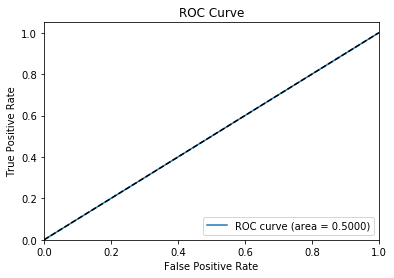

In [222]:
performance(Model=rf0,Y=Y_test,X=X_test)

# XGBoost

In [223]:
#import necessary libraries
from xgboost import XGBClassifier
import shap
# fit model no training data
xgb1 = XGBClassifier(learning_rate = 0.08,nthread=40,
 n_estimators=100,
 max_depth=3,
colsample_bytree=0.4 ,subsample = 0.4)
xgb1.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.4, gamma=0, learning_rate=0.08,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=40,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.4)

In [224]:
# make predictions for test set
y_pred = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred]

In [225]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.32%


the AUC is : 0.9934


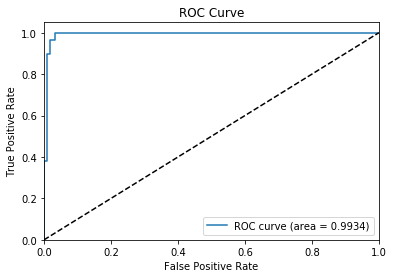

In [226]:
performance(Model=xgb1,Y=Y_test,X=X_test)

# Precision-Recall Curves¶


Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value. A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

There are also composite scores that attempt to summarize the precision and recall; two examples include:

F-Measure or F1 score: that calculates the harmonic mean of the precision and recall (harmonic mean because the precision and recall are rates). Area Under Curve: like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve. In terms of model selection, F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5), whereas the area under curve summarize the skill of a model across thresholds, like ROC AUC.

In [227]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

nORFc RF: f1=0.000 auc=0.597
norfc XGB: f1=0.933 auc=0.938
cadd : f1=0.000 auc=0.778


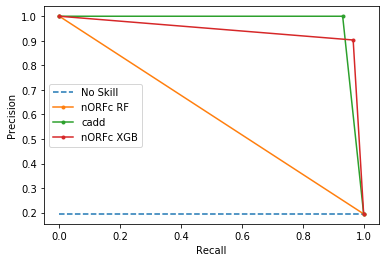

In [228]:

# RF predict class values
yhat = rf0.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, yhat)
lr_f1, lr_auc = f1_score(Y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('nORFc RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))


#XGB pridict 

xgbr_precision, xgbr_recall, _ = precision_recall_curve(Y_test, y_pred)
xgbr_f1, xgbr_auc = f1_score(Y_test, y_pred), auc(xgbr_recall, xgbr_precision)
# summarize scores
print('norfc XGB: f1=%.3f auc=%.3f' % (xgbr_f1, xgbr_auc))

#cadd
cr_precision, cr_recall, _ = precision_recall_curve(Y_test, cadd['PHRED'].values)
cr_f1, cr_auc = f1_score(Y_test,  cadd['PHRED'].values), auc(cr_precision, cr_recall)
# summarize scores
print('cadd : f1=%.3f auc=%.3f' % (cr_f1, cr_auc))




# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='nORFc RF')
pyplot.plot(cr_recall, cr_precision, marker='.', label='cadd')
pyplot.plot(xgbr_recall, xgbr_precision, marker='.', label='nORFc XGB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [143]:
# permutation importance 
imp = importances(rf0, X_test, Y_test) 


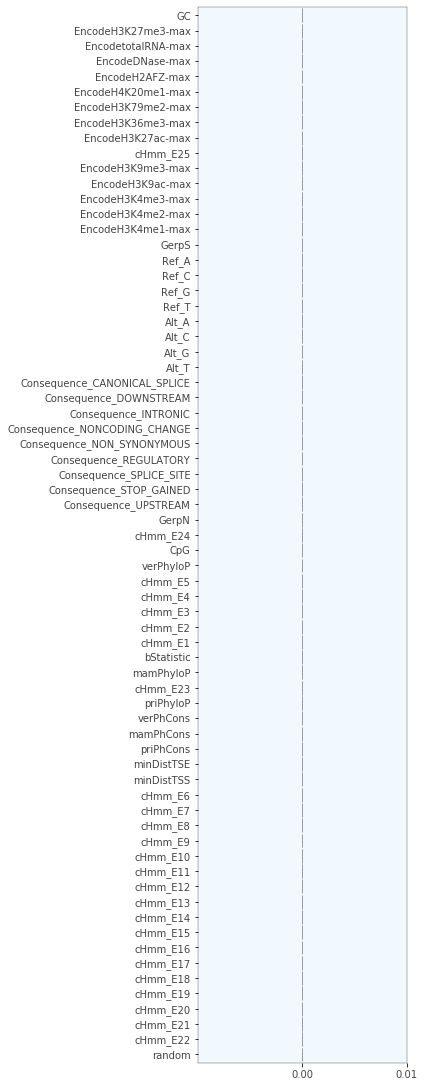

In [144]:
viz = plot_importances(imp,width=6,bgcolor='#F1F8FE', imp_range=(-.01, .01))
viz.view()

In [145]:
#dropout importance 
I = dropcol_importances(rf0, X_train, Y_train, X_test, Y_test)


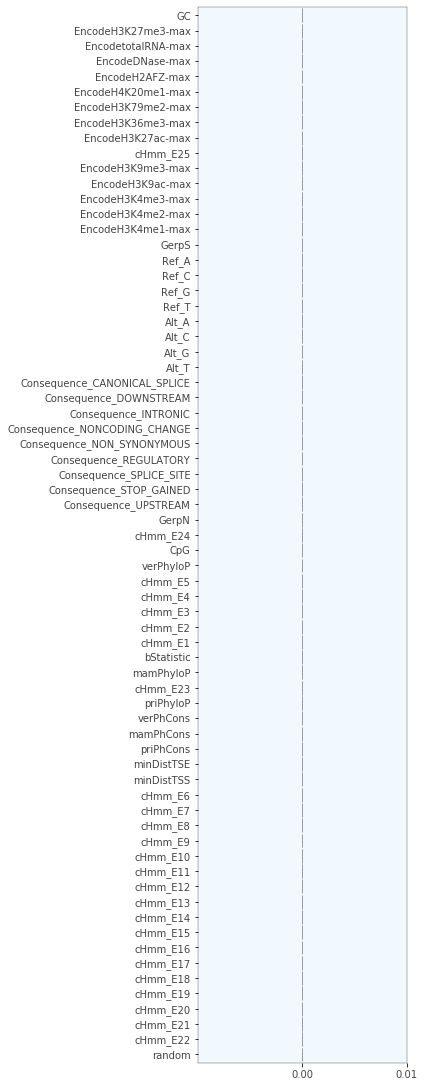

In [146]:
viz = plot_importances(I,width=6,bgcolor='#F1F8FE', imp_range=(-.01, .01))
viz.view()

In [147]:
#out of beg dropout 

I = oob_dropcol_importances(rf0, X_train, Y_train)

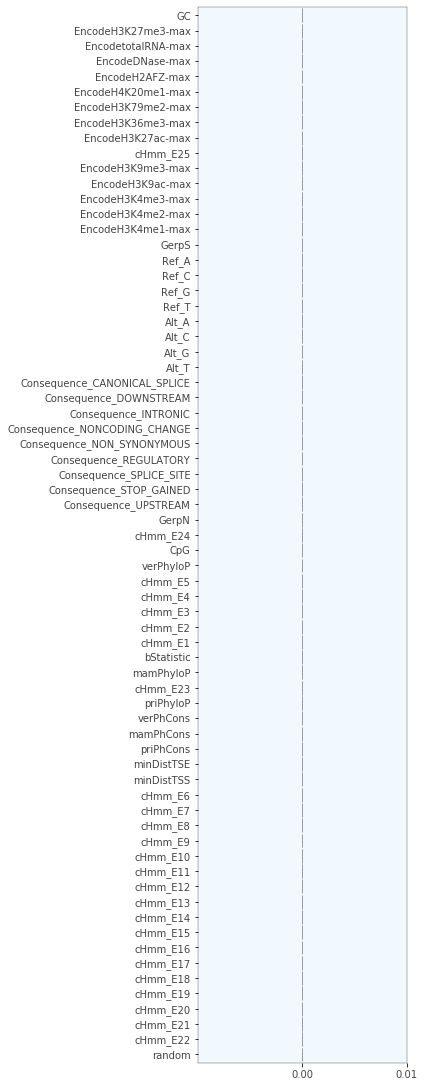

In [148]:
viz = plot_importances(I,width=6,bgcolor='#F1F8FE', imp_range=(-.01, .01))
viz.view()

In [149]:
#cross validation 

I = cv_importances(rf0, X_train, Y_train)


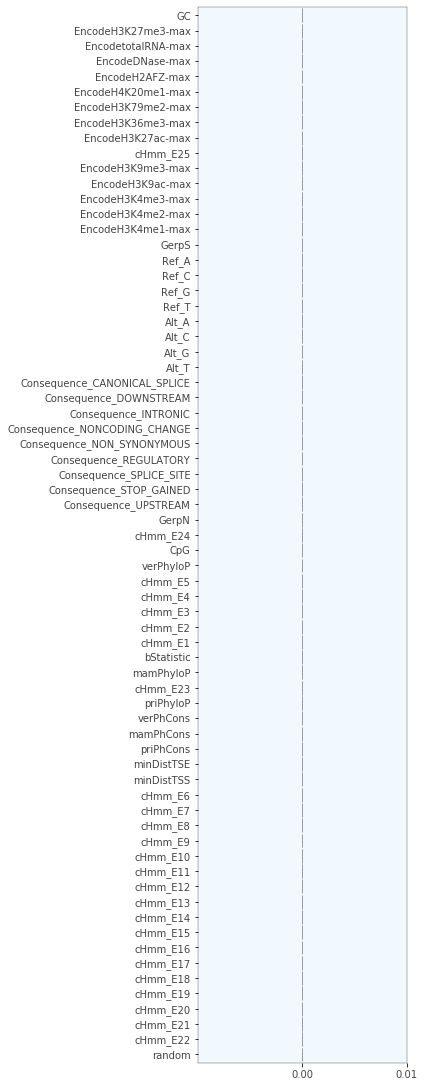

In [150]:
viz = plot_importances(I,width=6,bgcolor='#F1F8FE', imp_range=(-.01, .01))
viz.view()

/home/narumeena/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/narumeena/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/narumeena/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/narumeena/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/narumeena/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


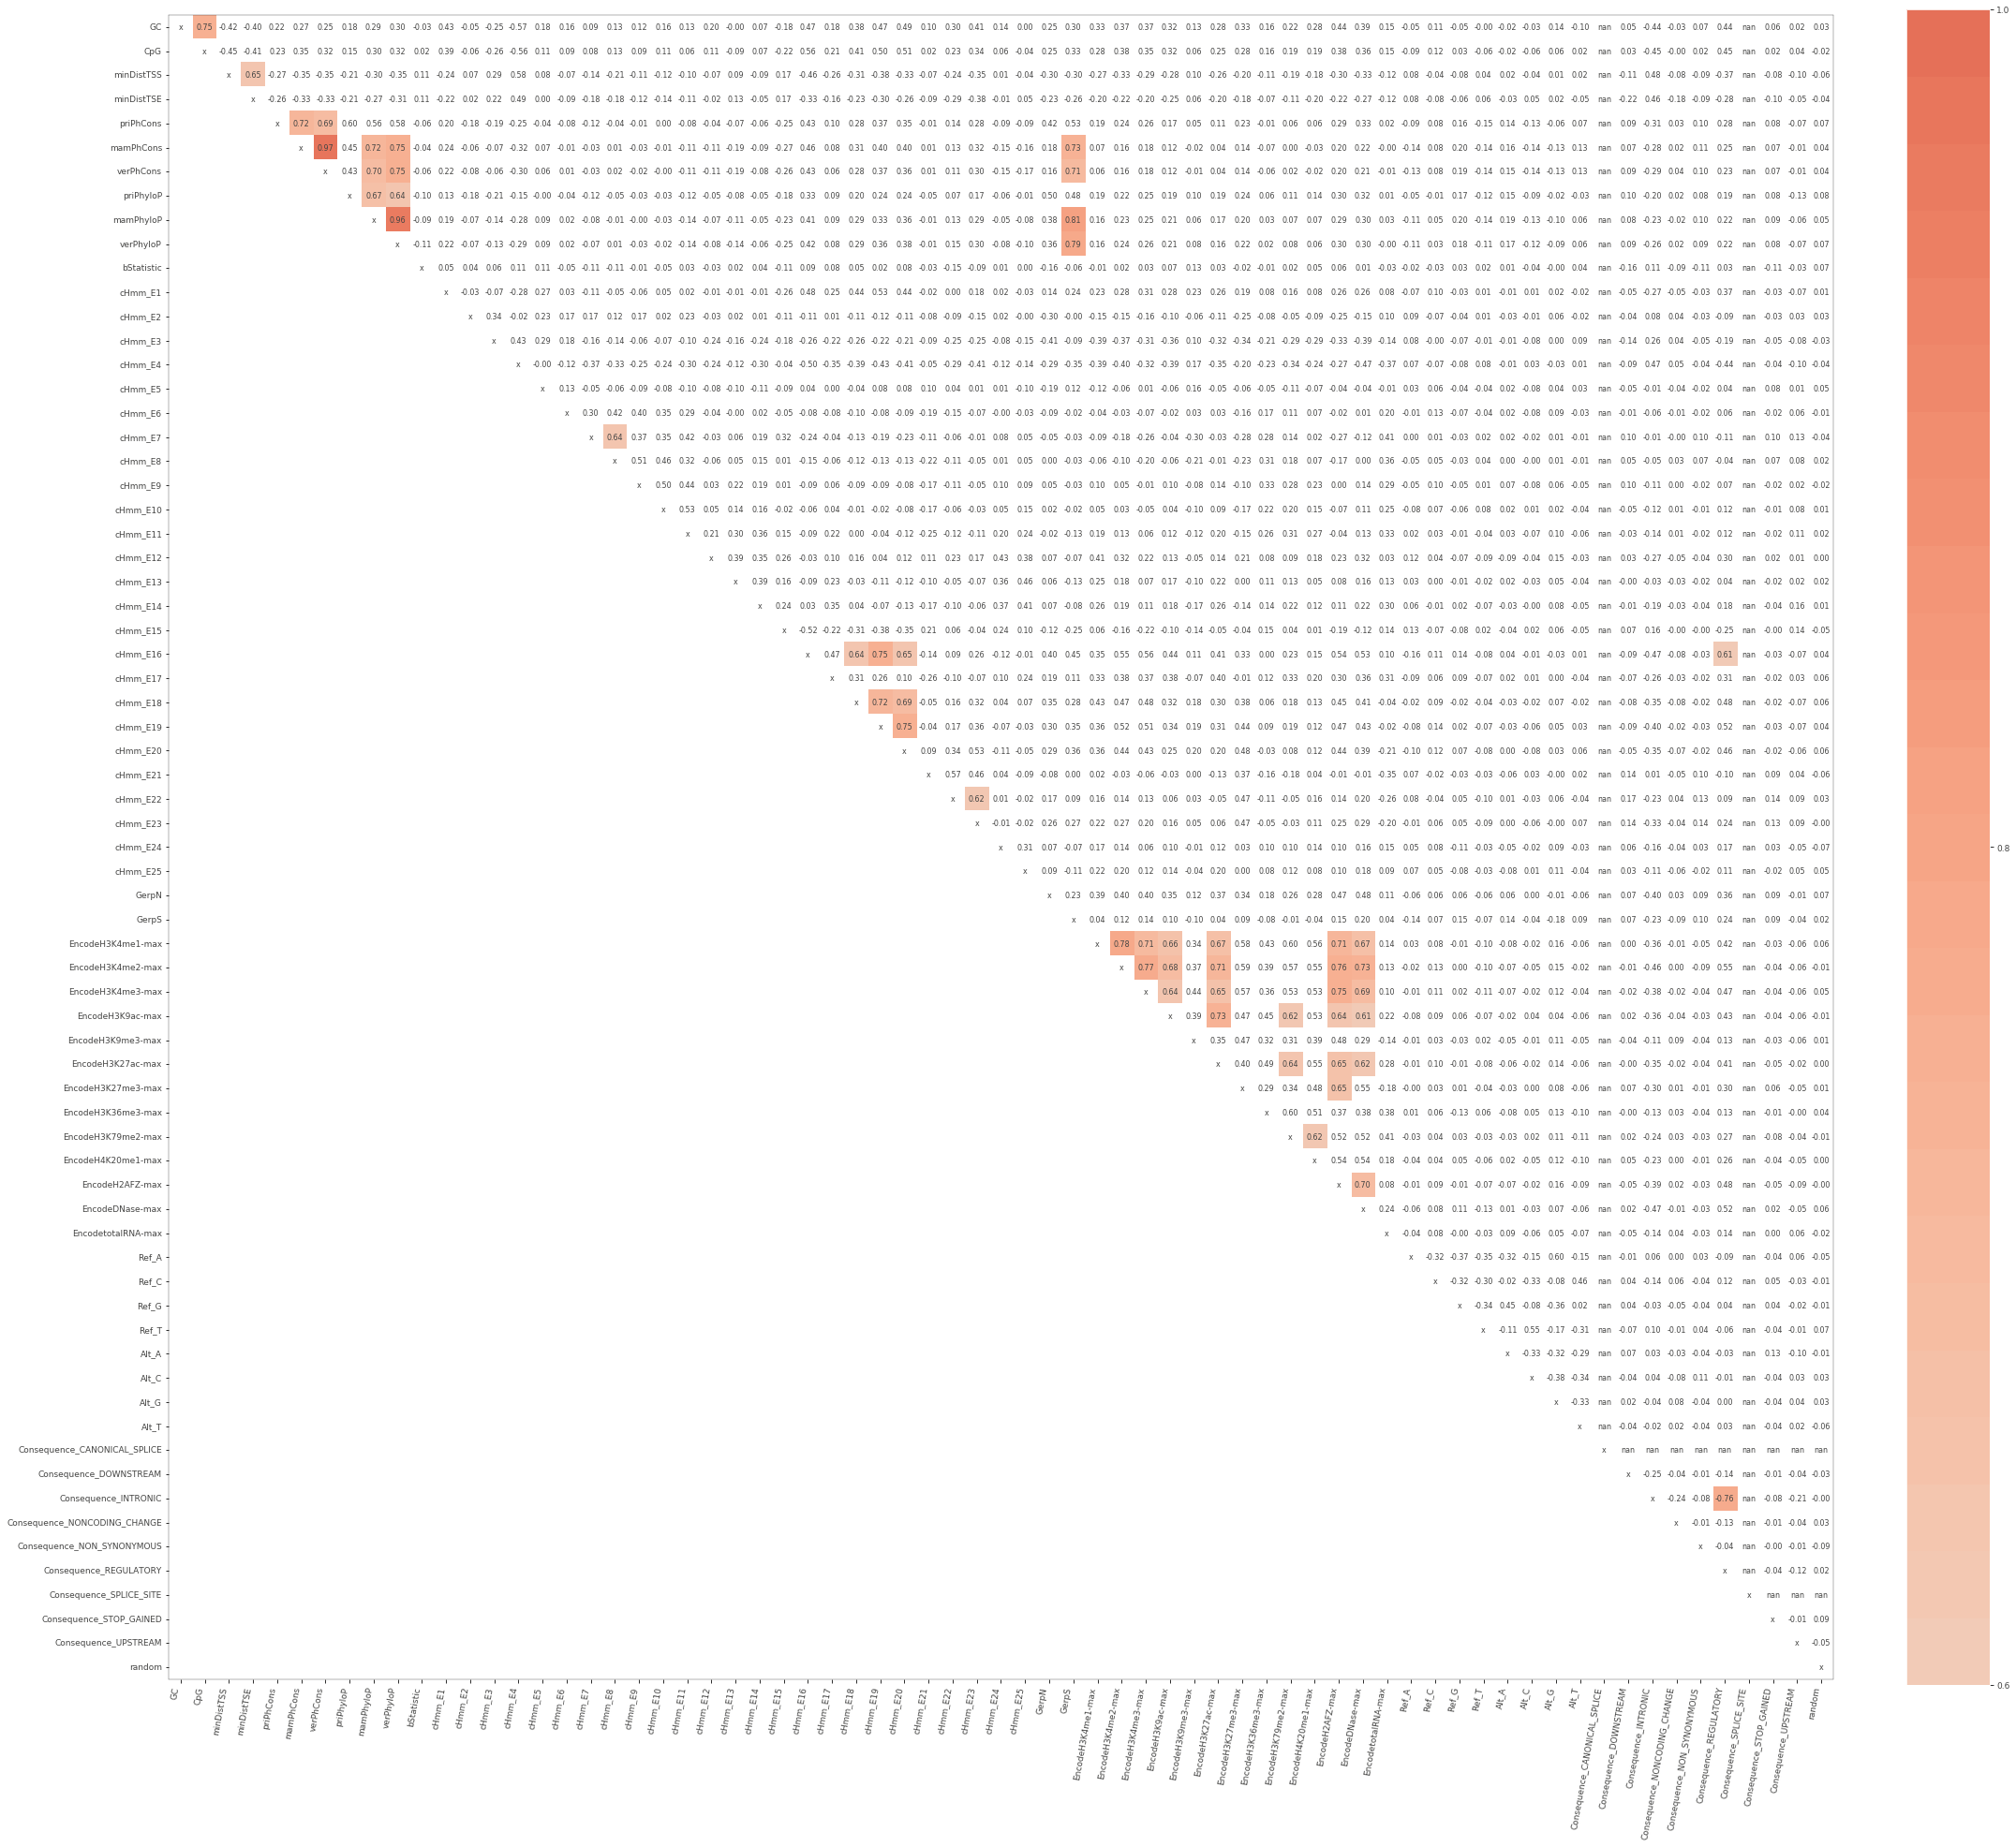

In [151]:
viz = plot_corr_heatmap(X_train, figsize=(30,30))
viz.view()